In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db_filename = 'dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

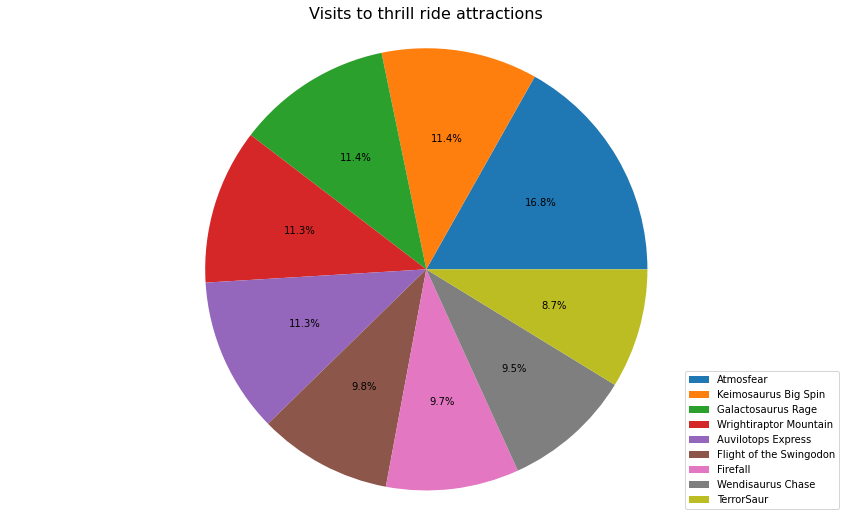

In [29]:
#Question 1,在数据库中根据checkin表统计统计各个Thrill ride景点的访问次数，并放到3个字段中，id、name、times，id表示景点ID，name表示景点名称，times表示访问次数,使用matplotlib进行绘图，图像结果如下
c.execute("SELECT checkin.attraction as id,attraction.Name,count(checkin.attraction) as times FROM checkin,attraction where checkin.attraction = attraction.AttractionID and attraction.Category like 'Thrill Rides%' GROUP BY checkin.attraction ORDER BY times DESC")
counts = c.fetchall()
data = pd.DataFrame.from_records(counts, columns=['id','Name', 'times'])
plt.figure(figsize=(15,9))
plt.pie(data['times'],labeldistance=1,autopct='%1.1f%%',shadow=False)
plt.axis('equal')
plt.title("Visits to thrill ride attractions",fontsize=16)
plt.legend(data['Name'],loc=4)
plt.show()

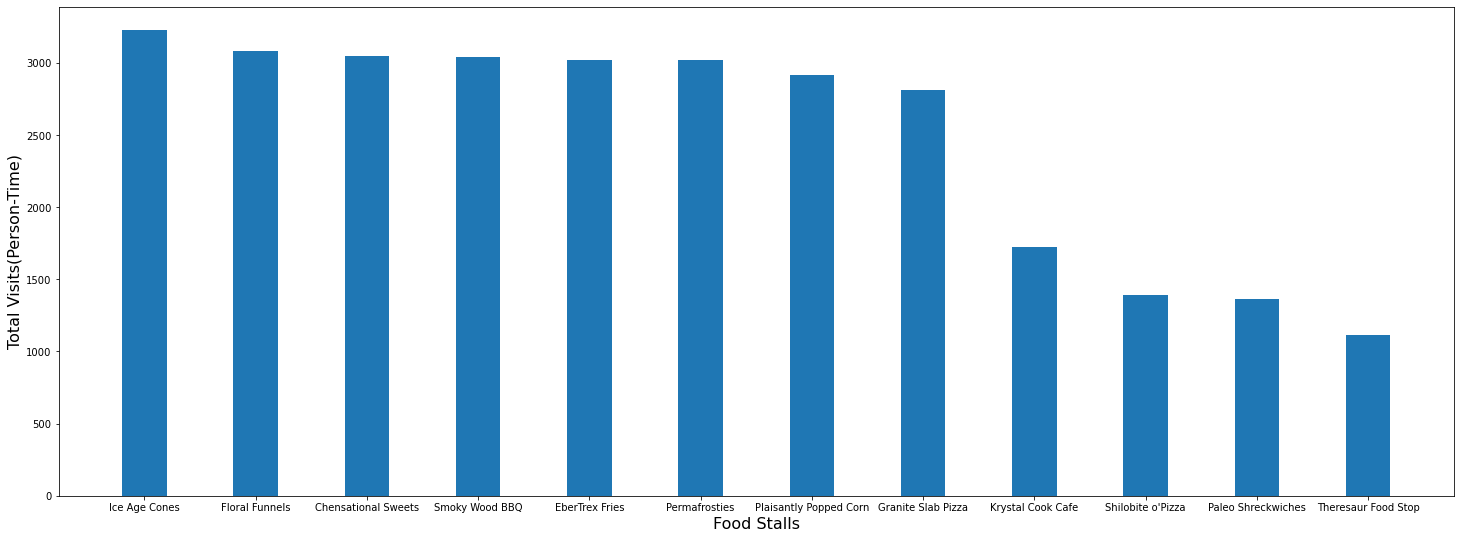

In [41]:
#Question 2 根据Checkin数据表统计各个Food stall的访问数据，数据结果放入到ID、Name、Times中，分别代表景点ID，景点名称和访问次数，使用matplotlib进行绘图，图像结果如下
c.execute("SELECT checkin.attraction as id,attraction.Name,count(checkin.attraction) as visits FROM checkin,attraction where checkin.attraction = attraction.AttractionID and attraction.Category like 'Food%' GROUP BY checkin.attraction ORDER BY visits DESC")
counts = c.fetchall()
data = pd.DataFrame.from_records(counts, columns=['id','Name', 'visits'])
plt.figure(figsize=(25,9))
plt.xlabel("Food Stalls",fontsize=16)
plt.ylabel("Total Visits(Person-Time)",fontsize=16)
plt.bar(range(len(data['visits'])),data['visits'],tick_label=data['Name'],width=0.4)
plt.show()


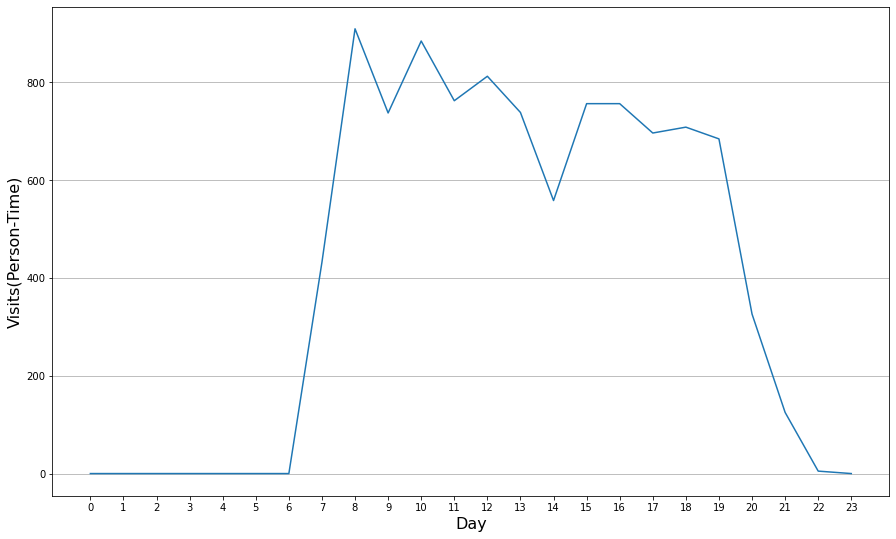

In [43]:
#Question 3 题中要求统计一天的访问情况，经过分析取了2014-06-07一天的数据进行分析，讲一天按小时划分未24个时间段，从checkin数据表的timestamp字段进行小时分析，最终按小时进行次数统计，结果放入Hour和visits字段，分别代表某个小时和访问次数，使用matplotlib进行绘图，图像结果如下
c.execute("SELECT cast(substr(checkin.timestamp,12,2) as int) as hour,count(checkin.attraction) as vistis FROM checkin,attraction where checkin.attraction = attraction.AttractionID and attraction.Name ='Atmosfear' and checkin.timestamp like '2014-06-07 %' GROUP BY hour ORDER BY hour ASC")
rs = c.fetchall()
data = pd.DataFrame(columns=['hour','vistis'])
for idx in range(1,25):
    data.loc[idx]=[idx,0]
for r in rs:
    data.loc[r[0]]=[r[0],r[1]]
plt.figure(figsize=(15,9))
plt.xlabel("Day",fontsize=16)
plt.ylabel("Visits(Person-Time)",fontsize=16)

plt.grid(axis='y')
plt.plot(range(len(data['vistis'])),data['vistis'])
plt.xticks(range(24) ,range(24))
plt.show()

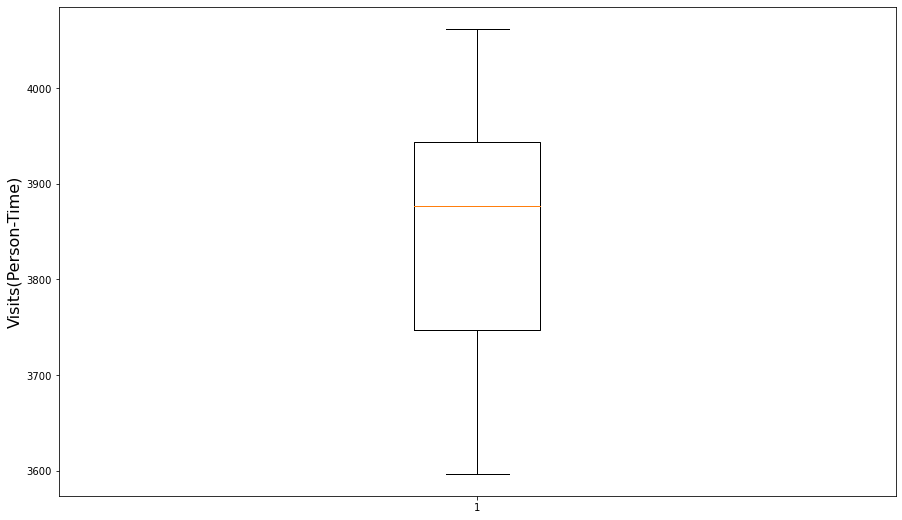

In [44]:
#Question 4 
c.execute("SELECT attraction.Name,count(checkin.attraction) as visits FROM checkin,attraction where checkin.attraction = attraction.AttractionID and attraction.Category like 'Kiddie Rides%' GROUP BY checkin.attraction ORDER BY visits DESC")
rs = c.fetchall()
data=pd.DataFrame.from_records(rs,columns=['Name', 'visits'])
plt.figure(figsize=(15,9))
plt.ylabel("Visits(Person-Time)",fontsize=16)
plt.boxplot(data['visits'])
plt.show()